# Social Network Graph Link Prediction - Facebook Challenge

### Problem Statement:  

Given a directed social graph, we have to predict missing links to recommend friends/connections/followers (Link Prediction in Graph).  

## Data Overview:  
Dataset from facebook's recruting challenge on kaggle.  
https://www.kaggle.com/competitions/FacebookRecruiting  

Data contains two coumns: source and destination edge pairs in the directed graph.  

Data Columns (total 2 columns):
- source_node ------------------->int64
- destination_node -------------> int64



### Data format and limitations 

The data provided in the problem just contains a souce node and a destination node, Nothing more than that.

If more information like the schooling where the user has done and some extra info as such would help, but keeping users data privacy in mind this is the only data provided by facebook

### Mapping the problem to supervised learning problem


- Map this to a binary classification task with 0 implying an absence of an edge and 1 implying the presence . Now, we need to featurize a pair of vertices (u_i, u_j) such that these features can help us predict the presence/absence of an edge. A simple feature could be number of common-friends to u_i and u_j which is highly inadictive of an edge between u_i and u_j.
- Reference papers and videos
    - https://www.cs.cornell.edu/home/kleinber/link-pred.pdf
    - https://www3.nd.edu/~dial/publications/lichtenwalter2010new.pdf
    - https://www.youtube.com/watch?v=2M77Hgy17cgb

### Business objectives and constraints:

- No low-latency requirement
- Predicting the probability of the link is useful to recommend the highest probability links to user
- We got to suggest connections which are most likely to be correct and we should try and not miss out any connection

### Performance metric for  supervised learning

- Both precision and recall are important, hence F1 score is good choice
- Confusion matrix

There is one more metric called precision@Top10, this metric will be useful because we can only suggest few people in recommendation list. but in this case study we will not use it.

## EDA

### EDA: Basic stats

In [16]:
import warnings
warnings.filterwarnings("ignore")

import csv
import pandas as pd
import datetime
import time
import numpy as np

import matplotlib
import matplotlib.pylab as plt

In [2]:
train_csv = pd.read_csv('./train.csv')

In [3]:
print(train_csv[train_csv.isna().any(1)])
print(train_csv.info())
print('Number of duplicate entries : {}'.format(sum(train_csv.duplicated())))
train_csv.to_csv('./train_preprocessed.csv', header= False, index= False)

Empty DataFrame
Columns: [source_node, destination_node]
Index: []
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9437519 entries, 0 to 9437518
Data columns (total 2 columns):
 #   Column            Dtype
---  ------            -----
 0   source_node       int64
 1   destination_node  int64
dtypes: int64(2)
memory usage: 144.0 MB
None
Number of duplicate entries : 0


In [4]:
import networkx as nx

g = nx.read_edgelist('./train_preprocessed.csv', delimiter= ',', create_using= nx.DiGraph(), nodetype = int)
print(nx.info(g))

DiGraph with 1862220 nodes and 9437519 edges


DiGraph with 34 nodes and 25 edges


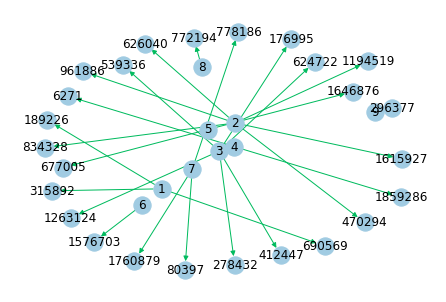

In [18]:
pd.read_csv('./train.csv', nrows=25).to_csv('sub_data.csv', header= False, index= False)

subgraph = nx.read_edgelist('sub_data.csv', delimiter= ',', create_using= nx.DiGraph(), nodetype = int)

pos = nx.spring_layout(subgraph)
nx.draw(subgraph, pos, node_color = '#A0CBE2', edge_color = '#00bb5e', width = 1, edge_cmap = plt.cm.Blues, with_labels = True)
plt.savefig('graph_sample.pdf')
print(nx.info(subgraph))

### EDA: Follwer and following stats

In [19]:
print("Number of people on this social network: {}".format(len(g.nodes())))

Number of people on this social network: 1862220
